# Notebook accompaning Chapter 2 from 


* Discovering knowledge in data : an introduction to data mining / Daniel T. Larose

This notebook shows how we can do all things described in this chapter rather easily inside `pandas`.



## Download all data

* You can do this within Python of course, but from the shell it is super easy, using `wget`. The following command _recursively_ downloads all webpages "below" (that is the `-np` (for no parents)) the given url. 
* `wget -np -r http://www.sgi.com/tech/mlc/db/`
* It will create a directory structure `www.sgi.com/tech/mlc/db/` below the working directory and put all files in there.

In [1]:
import pandas as pd
%matplotlib inline
#!wget -np -r http://www.sgi.com/tech/mlc/db/

In [2]:
# list all the datasets in the  www.sgi.com/tech/mlc/db folder
!ls www.sgi.com/tech/mlc/db/*.data

SyntaxError: invalid syntax (<ipython-input-2-db63ad8f2f9d>, line 2)

In [16]:
ls -lh www.sgi.com/tech/mlc/db/cars*

-rw-r--r--  1 AndreasVos  staff    17K Feb 27  2001 www.sgi.com/tech/mlc/db/cars.all
-rw-r--r--  1 AndreasVos  staff    12K Feb 27  2001 www.sgi.com/tech/mlc/db/cars.data
-rw-r--r--  1 AndreasVos  staff   362B Feb 27  2001 www.sgi.com/tech/mlc/db/cars.names
-rw-r--r--  1 AndreasVos  staff   5.9K Feb 27  2001 www.sgi.com/tech/mlc/db/cars.test
-rw-r--r--  1 AndreasVos  staff    15K Feb 27  2001 www.sgi.com/tech/mlc/db/cars1.all
-rw-r--r--  1 AndreasVos  staff   9.8K Feb 27  2001 www.sgi.com/tech/mlc/db/cars1.data
-rw-r--r--  1 AndreasVos  staff   366B Feb 27  2001 www.sgi.com/tech/mlc/db/cars1.names
-rw-r--r--  1 AndreasVos  staff   4.9K Feb 27  2001 www.sgi.com/tech/mlc/db/cars1.test


# Let's try

* Let us just try to read in the data with pandas

In [3]:
carsdf= pd.read_csv('www.sgi.com/tech/mlc/db/cars.data')
print carsdf.shape
carsdf.head()

(261, 1)


,,,,,,,,|1x3 Cross validator
14.0,8,350,165,4209,12,1972,chevrolet,US.
31.9,4,89,71,1925,14,1980,vw,Europe.
17.0,8,302,140,3449,11,1971,ford,US.
15.0,8,400,150,3761,10,1971,chevrolet,US.
30.5,4,98,63,2051,17,1978,chevrolet,US.


* That does not look good. 
* Let's check out the file. In linux we can do that using `head` or `cat`: these commands just print the file to the terminal.

### What do we learn?
* first line should go
* the file does not have column headers
* comma separated (that is good, that is the default in pandas).

### How to fix this?
* Learn the arguments of `pd.read_csv` by running `pd.read_csv?`
* Only use Google if the manual that you can access does not give you the information

In [4]:
!head www.sgi.com/tech/mlc/db/cars.data

|1x3 Cross validator
14, 8, 350, 165, 4209, 12, 1972, chevrolet, US.
31.9, 4, 89, 71, 1925, 14, 1980, vw, Europe.
17, 8, 302, 140, 3449, 11, 1971, ford, US.
15, 8, 400, 150, 3761, 10, 1971, chevrolet, US.
30.5, 4, 98, 63, 2051, 17, 1978, chevrolet, US.
23, 8, 350, 125, 3900, 17, 1980, cadillac, US.
13, 8, 351, 158, 4363, 13, 1974, ford, US.
14, 8, 440, 215, 4312, 9, 1971, plymouth, US.
25.4, 5, 183, 77, 3530, 20, 1980, mercedes, Europe.


In [5]:
carsdf= pd.read_csv('www.sgi.com/tech/mlc/db/cars.data', skiprows=1, 
                    names=['mpg','cylinders','cubicinches','hp','no_idea','no_idea2','year','brand','country'])
carsdf.head()

,mpg,cylinders,cubicinches,hp,no_idea,no_idea2,year,brand,country
0,14.0,8,350,165,4209,12,1972,chevrolet,US.
1,31.9,4,89,71,1925,14,1980,vw,Europe.
2,17.0,8,302,140,3449,11,1971,ford,US.
3,15.0,8,400,150,3761,10,1971,chevrolet,US.
4,30.5,4,98,63,2051,17,1978,chevrolet,US.


In [6]:
carsdf.describe()

,mpg,cylinders,cubicinches,hp,no_idea,no_idea2,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,201.103448,106.360153,3005.490421,15.547893,1976.819923
std,7.823570,1.733310,108.879683,40.499959,852.645596,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2246.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2835.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


# Missing values

In the book they perform the following techniques on missing values:

1. Replace the missing value with some constant, specified by the analyst.
2. Replace the missing value with the field mean (for numerical variables) or the mode (for categorical variables).
3. Replace the missing values with a value generated at random from the variable distribution observed.

### How to do that in pandas?

* See <http://pandas.pydata.org/pandas-docs/stable/missing_data.html>

* [How do missing values look like?](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#values-considered-missing) Easy, like `NaN` or `None`. 
* How to check for missing values?
    * **Your turn** Figure out what `carsdf.isnull()` and `.notnull()` are doing. You can ask pandas of course using `carsdf.isnull?`. Now what is `carsdf.year.notnull()`, and what does it say? And what about `carsdf.isnull().mean()` and `carsdf.notnull().mean()`? What do they say?
    * **Your turn 2** Create out of our cars file a file _with the same missing data as in the book_, and then experiment with the same commands.
* [Cleaning and filling missing data](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#cleaning-filling-missing-data) 
    * **Your turn** Find out how to replace missing values with a constant
        * everywhere with the same constant
        * just for one or a few specified columns
    * **Your turn** Find out how to replace missing values with the columns mean
        * everywhere  
        * just for one or a few specified columns
    * **Your turn** Find out how to replace missing values with a random value from the column
        * all missing values in a column with the same random value is easy.
        * can you do it when picking a new random value for every missing value?
        *  Try the `random` module and consider a command like `carsdf.year.values`
        
        
### Pandas can do much more

Continue reading  <http://pandas.pydata.org/pandas-docs/stable/missing_data.html> and you learn great things about missing value handling in Pandas. Also the value normalization using regular expressions and `replace` is very useful.

In [7]:
carsdf.country.str.replace('.','').head()

0         US
1     Europe
2         US
3         US
4         US
Name: country, dtype: object

In [8]:
carsdf.country.str.replace(r'U.*','USA').head()

0         USA
1     Europe.
2         USA
3         USA
4         USA
Name: country, dtype: object

# IDENTIFYING MISCLASSIFICATIONS

### Get a histogram of the values in a column

In [9]:
# Get a histogram of the values in a column

carsdf.country.value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name: country, dtype: int64

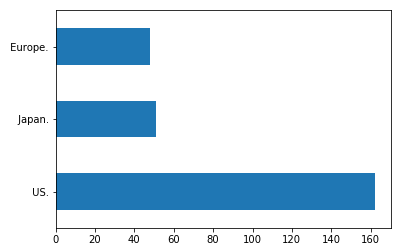

In [10]:
carsdf.country.value_counts().plot(kind='barh');

In [11]:
carsdf.country.value_counts().plot

In [12]:
carsdf.year.value_counts()

1974    35
1977    26
1971    23
1976    22
1980    21
1979    21
1982    18
1981    18
1978    18
1983    16
1973    16
1972    15
1975    12
Name: year, dtype: int64

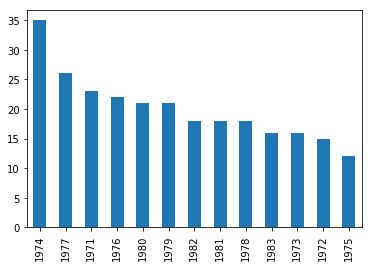

In [13]:
carsdf.year.value_counts().plot(kind ='bar');

count     261.000000
mean     1976.819923
std         3.637696
min      1971.000000
25%      1974.000000
50%      1977.000000
75%      1980.000000
max      1983.000000
Name: year, dtype: float64


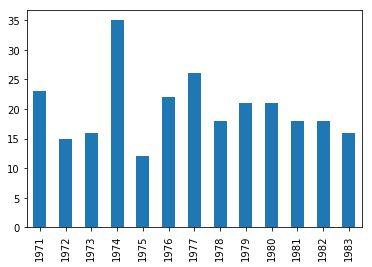

In [14]:
carsdf.year.value_counts().sort_index().plot(kind ='bar');
print carsdf.year.describe()

# Your turn

* Reproduce figure 2.5


# Scatter plots

* **Your turn**: try to reproduce Figure 2.6.
* I could not find those outliers in the given datasets....
* Experiment with the extra parameters that you can give. Try to add those arrows as well. 

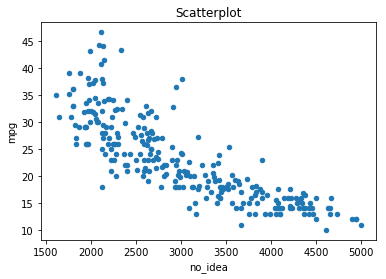

In [15]:
carsdf.plot.scatter(x='no_idea',y='mpg', title='Scatterplot');


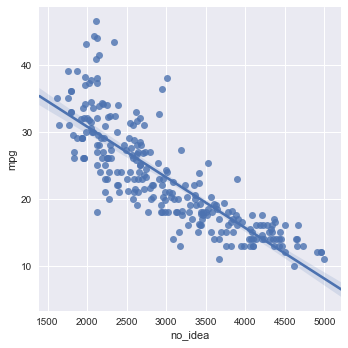

In [16]:
# Simply adding a regression line

import seaborn as sns
sns.lmplot(x='no_idea',y='mpg',data=carsdf,fit_reg=True);

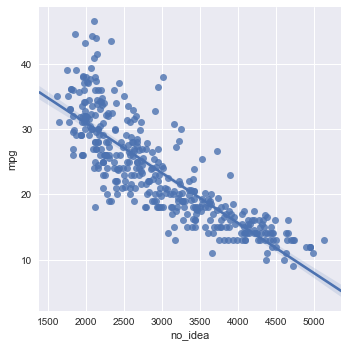

In [17]:
carsdf2= pd.read_csv('www.sgi.com/tech/mlc/db/cars.all',   
                    names=['mpg','cylinders','cubicinches','hp','no_idea','no_idea2','year','brand','country'])
sns.lmplot(x='no_idea',y='mpg',data=carsdf2,fit_reg=True);

# DATA TRANSFORMATION

### Your turn
* Reproduce Figure 2.7



## Min–Max Normalization

* Here we show how easy you program min-max normalization in pandas.

* **Your turn**: do the same but now for **time-to-60**

count    392.000000
mean       0.384200
std        0.207580
min        0.000000
25%        0.212766
50%        0.365691
75%        0.531915
max        1.000000
Name: mpg, dtype: float64


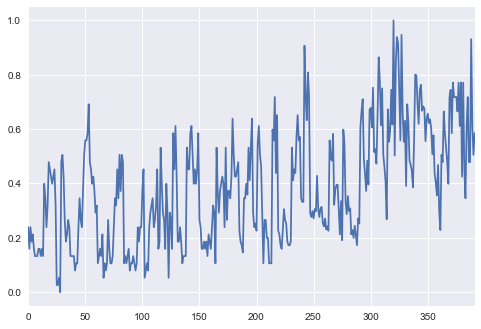

In [18]:
df= carsdf2.mpg

dfnorm=(df - df.min()) / (df.max() - df.min())

print dfnorm.describe()

dfnorm.plot();

## Z-Score Standardization

* **Your turn**
    * Compute the Z score normalization for _time to 60_
    * reproduce Figure 2.8 
* **Hint** Use df. TAB to see which methods exist for a series or a dataframe. Maybe the method for the mean of a column is called ....

# Your turn

Make all exercises from Chapter 2.



1. Describethepossiblenegativeeffectsofproceedingdirectlytominedatathathasnotbeen preprocessed.
2. Find the mean value for the income attribute of the five customers in Table 2.1 before preprocessing. What does this number actually mean? Calculate the mean income for the three values left after preprocessing. Does this value have a meaning?
3. Which of the three methods from Figures 2.2 to 2.4 do you prefer for handling missing
values?
a. Which method is the most conservative and probably the safest, meaning that it fabri- cates the least amount of data? What are some drawbacks to this method?
b. Which method would tend to lead to an underestimate of the spread (e.g., standard deviation) of the variable? What are some benefits to this method?
c. What are some benefits and drawbacks of the method that chooses values at random from the variable distribution?
4. Make up a classification scheme that is inherently flawed and would lead to misclassifi- cation, as we find in Table 2.2: for example, classes of items bought in a grocery store.
5. Make up a data set consisting of eight scores on an exam in which one of the scores is an outlier.
a. Find the mean score and the median score, with and without the outlier.
b. State which measure, the mean or the median, the presence of the outlier affects more,
and why. (Mean, median, and other statistics are explained in Chapter 4.)
c. Verify that the outlier is indeed an outlier, using the IQR method.
6. Make up a data set, consisting of the heights and weights of six children, in which one of the children, but not the other, is an outlier with respect to one of the variables. Then alter this data set so that the child is an outlier with respect to both variables.
7. UsingyourdatasetfromExercise5,findthemin–maxnormalizationofthescores.Verify that each value lies between zero and 

## Hands-on Analysis
Use the churn data set at the book series Web site for the following exercises.

8. Explore whether there are missing values for any of the variables.
9. Compare the area code and state fields. Discuss any apparent abnormalities.
10. Use a graph to determine visually whether there are any outliers among the number of calls to customer service.
11. Transform the day minutes attribute using min–max normalization. Verify using a graph that all values lie between zero and 1.
12. Transform the night minutes attribute using Z-score standardization. Using a graph, de- scribe the range of the standardized values.

Question 1 

The data could be in the wrong format, there could be empty values or not wel coded special caracters. Maybe you don't need anything and that will cost computational power

In [ ]:
#Question 2
#Find the mean value for the income attribute of the five customers in Table 2.1 before preprocessing. 
#What does this number actually mean? 
#Calculate the mean income for the three values left after preprocessing. Does this value have a meaning?


